Use this notebook to introduce services to one another, so that they can trust each other

In [20]:
from Acquire.Client import User, Service
from Acquire.Identity import Authorisation

In [2]:
url = "http://fn.acquire-aaai.com:8080/t"

In [3]:
identity_service = Service(service_url="%s/identity" % url)
print(identity_service)

IdentityService(url=http://fn.acquire-aaai.com:8080/t/identity, uid=fdac3ab5-3527-46f8-8432-c7ec8f586fc6)


http://fn.acquire-aaai.com:8080/t/identity/s?id=1365e941


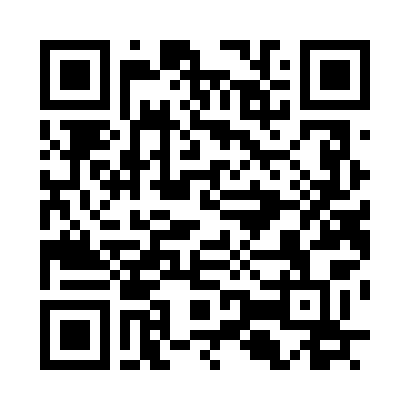

In [4]:
admin_identity = User("admin-%s" % identity_service.service_type(), identity_url=identity_service.canonical_url())
(login_url, qrcode) = admin_identity.request_login()
print(login_url)
qrcode

In [5]:
admin_identity.wait_for_login()

True

In [6]:
accounting_service = Service(service_url="%s/accounting" % url)
print(accounting_service)

AccountingService(url=http://fn.acquire-aaai.com:8080/t/accounting, uid=ee005e09-c312-44be-bcce-08ac158a1234)


http://fn.acquire-aaai.com:8080/t/accounting/s?id=e739475f


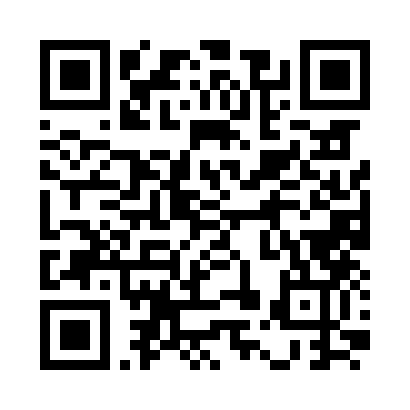

In [7]:
admin_accounting = User("admin-%s" % accounting_service.service_type(), identity_url=accounting_service.canonical_url())
(login_url, qrcode) = admin_accounting.request_login()
print(login_url)
qrcode

In [8]:
admin_accounting.wait_for_login()

True

In [9]:
access_service = Service(service_url="%s/access" % url)
print(access_service)

AccessService(url=http://fn.acquire-aaai.com:8080/t/access, uid=ab495477-5781-45f3-baef-1a17f62d4c56)


http://fn.acquire-aaai.com:8080/t/access/s?id=67bce45d


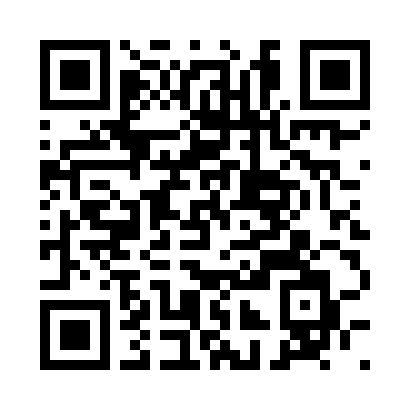

In [10]:
admin_access = User("admin-%s" % access_service.service_type(), identity_url=access_service.canonical_url())
(login_url, qrcode) = admin_access.request_login()
print(login_url)
qrcode

In [11]:
admin_access.wait_for_login()

True

In [12]:
storage_service = Service(service_url="%s/storage" % url)
print(storage_service)

StorageService(url=http://fn.acquire-aaai.com:8080/t/storage, uid=c91771a1-3132-42f7-aebc-b7fe63119776)


http://fn.acquire-aaai.com:8080/t/storage/s?id=8c69bcd7


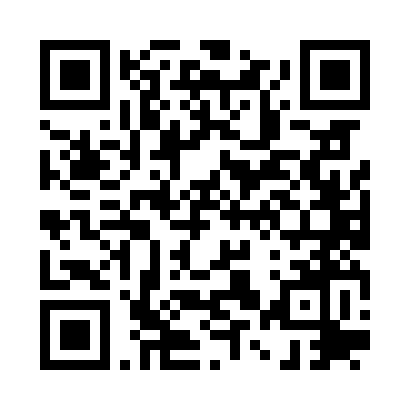

In [13]:
admin_storage = User("admin-%s" % storage_service.service_type(), identity_url=storage_service.canonical_url())
(login_url, qrcode) = admin_storage.request_login()
print(login_url)
qrcode

In [14]:
admin_storage.wait_for_login()

True

In [21]:
resource = "trust_service %s" % identity_service.uid()
public_cert = identity_service.public_certificate().to_data()
args = {"service_url": identity_service.canonical_url(),
            "authorisation": Authorisation(user=admin_accounting,
                                           resource=resource).to_data(),
            "public_certificate": public_cert}

In [22]:
response = accounting_service.call_function(
                    function="admin/trust_service", args=args)
print(response)

{'status': 0, 'message': 'Success. Now trusting IdentityService(url=http://fn.acquire-aaai.com:8080/t/identity, uid=fdac3ab5-3527-46f8-8432-c7ec8f586fc6)', 'args': {'service_url': 'http://fn.acquire-aaai.com:8080/t/identity', 'authorisation': {'user_uid': '9443658c-a52b-4d2a-9c4d-4ecb36fa3f47', 'session_uid': 'e739475f-5a8d-415e-8053-07b512fac1c2', 'identity_url': 'http://fn.acquire-aaai.com:8080/t/accounting', 'identity_uid': 'ee005e09-c312-44be-bcce-08ac158a1234', 'auth_datetime': '2019-02-13T18:31:20.973944', 'signature': 'EUi4dUfxr0A4t4Q62m/aA0pN5jCQ5mhL3mkoij/G14omsY2SZHHJTUsYS0py8kBp5YGmTWz7D1/w3ihd6qGQEyeyu/w1cSS+HTOCqF6fn4g1Qwp0+xCVnJcdVEBdo19zo4u9HCQgy2Thkh+YdgvExW++41fn4lhf7HMPAE8uQ+OtJeeH5H8JoHr7GmO2lPXEcyR8ZGyKVyqNFOP+7As8Aoc3ARnZFu4X3ZCaN6SFkGn/GbxBMjt/yD/8cxK3k8CqI4+JfdTq6i2UvtazMBUzAuIcSYezriknNkHlw0O58x0mmh45wIh35rcQ1sQH01119MLih7H8jLu+IIyESPq7bA=='}, 'public_certificate': {'bytes': 'LS0tLS1CRUdJTiBQVUJMSUMgS0VZLS0tLS0KTUlJQklqQU5CZ2txaGtpRzl3MEJBUUVGQUFPQ0FROEFNSUlCQ2d

In [23]:
resource = "trust_service %s" % identity_service.uid()
public_cert = identity_service.public_certificate().to_data()
args = {"service_url": identity_service.canonical_url(),
            "authorisation": Authorisation(user=admin_access,
                                           resource=resource).to_data(),
            "public_certificate": public_cert}

In [24]:
response = access_service.call_function(
                    function="admin/trust_service", args=args)
print(response)

{'status': 0, 'message': 'Success. Now trusting IdentityService(url=http://fn.acquire-aaai.com:8080/t/identity, uid=fdac3ab5-3527-46f8-8432-c7ec8f586fc6)', 'args': {'service_url': 'http://fn.acquire-aaai.com:8080/t/identity', 'authorisation': {'user_uid': '1b00addb-71b8-4b3f-bfb2-de7c39ab07af', 'session_uid': '67bce45d-9daa-4d60-af8e-6fcba21feab8', 'identity_url': 'http://fn.acquire-aaai.com:8080/t/access', 'identity_uid': 'ab495477-5781-45f3-baef-1a17f62d4c56', 'auth_datetime': '2019-02-13T18:31:54.549419', 'signature': 'FTZiVkwFfqh4/Q2jm7fidboVbNN9Abcz/1IZ1gjUAV63xhVjAgdmvENmGd0CoMlgzufyfKnSRVVJ82eyA6NwgzH3GXQvFatZcWR7H6fF1dOgkO2NRaM3utILEr7cTi3nnCbyEh4106FiMYipRYlhQypzfreEeBDA7bcYP0/234Qhbq9NW5S3EdiXfIDu8j89F2CDKSU8aaoVGvqL5ClqQbuz5vSe/lWGO/U1gQ0giT3ZpT2fCPrRwSPqU+Gle2Z2KgtMwS/nhkX0zrFfEQ7VI1N5bWOOT0bIXag4hdiukFi31EbAM1GFvK8cbapE/px36geYJPz0NPX0EEacwVNI4Q=='}, 'public_certificate': {'bytes': 'LS0tLS1CRUdJTiBQVUJMSUMgS0VZLS0tLS0KTUlJQklqQU5CZ2txaGtpRzl3MEJBUUVGQUFPQ0FROEFNSUlCQ2dLQ0F

In [25]:
resource = "trust_service %s" % identity_service.uid()
public_cert = identity_service.public_certificate().to_data()
args = {"service_url": identity_service.canonical_url(),
            "authorisation": Authorisation(user=admin_storage,
                                           resource=resource).to_data(),
            "public_certificate": public_cert}

In [26]:
response = storage_service.call_function(
                    function="admin/trust_service", args=args)
print(response)

{'status': 0, 'message': 'Success. Now trusting IdentityService(url=http://fn.acquire-aaai.com:8080/t/identity, uid=fdac3ab5-3527-46f8-8432-c7ec8f586fc6)', 'args': {'service_url': 'http://fn.acquire-aaai.com:8080/t/identity', 'authorisation': {'user_uid': 'a94f4e55-96e1-462a-a4db-487cc6d600f2', 'session_uid': '8c69bcd7-43e8-4ace-9392-00d535acce9c', 'identity_url': 'http://fn.acquire-aaai.com:8080/t/storage', 'identity_uid': 'c91771a1-3132-42f7-aebc-b7fe63119776', 'auth_datetime': '2019-02-13T18:32:51.672097', 'signature': 'Kmo9Soj4HrEZGPurNwGuhe0NbwYG2cDuevrQWcwPmU/eC+kzvPBxmnHVGYeojMFlp+DHfbh3LrzHaj545Uk4urwR/+pkG4QNzlQJdjPCDpH09JGYep9KnLhKTpuUSi8L5eyNgVhwDUbRIrnAsFwrvGq6fQ8JHPVXW2x3nuttB0kVW+X39tm67FmoiZTHzYhCKS6JjCA8Rm2xNgWb1uSuHC0HtSg1jxHnWMV0SDM9nt6INhWH76UA7UHbsvRlFgfCgc0ZFIqJ6/K1MPlR7wh5ZjU4fmnmp2Ot/+FuU8QD/oZT8WufGdhEIim6oGboLYlDrcrHr5IHG7mE1OAfhVQvGQ=='}, 'public_certificate': {'bytes': 'LS0tLS1CRUdJTiBQVUJMSUMgS0VZLS0tLS0KTUlJQklqQU5CZ2txaGtpRzl3MEJBUUVGQUFPQ0FROEFNSUlCQ2dLQ0

In [29]:
resource = "trust_service %s" % access_service.uid()
public_cert = access_service.public_certificate().to_data()
args = {"service_url": access_service.canonical_url(),
            "authorisation": Authorisation(user=admin_accounting,
                                           resource=resource).to_data(),
            "public_certificate": public_cert}

In [30]:
response = accounting_service.call_function(
                    function="admin/trust_service", args=args)
print(response)

{'status': 0, 'message': 'Success. Now trusting AccessService(url=http://fn.acquire-aaai.com:8080/t/access, uid=ab495477-5781-45f3-baef-1a17f62d4c56)', 'args': {'service_url': 'http://fn.acquire-aaai.com:8080/t/access', 'authorisation': {'user_uid': '9443658c-a52b-4d2a-9c4d-4ecb36fa3f47', 'session_uid': 'e739475f-5a8d-415e-8053-07b512fac1c2', 'identity_url': 'http://fn.acquire-aaai.com:8080/t/accounting', 'identity_uid': 'ee005e09-c312-44be-bcce-08ac158a1234', 'auth_datetime': '2019-02-13T18:35:13.195583', 'signature': 'C3QGIJtLId5iAvcX88ILiswY9cjPADvU0iyYx58PJkMx3ircLSUHlqCBo6nXJi7b47gUMS+rXdx0COBiF4VuyHkOSi0RIMEqvPX4LwzaMKpUMCIERN1K/VQ5q/3nfHWexXvzYgKOs+KKrv6qM8jxS2XiHfWWOPt1hQR/dgWvDMvkbQmF73qtc9+wJNtgTDgFmj0QhALSGA5XefbR4HX4aomGd40E/ExPvBQOlAsRtQIR6yEZPPD0NjtYtjsPYI/87Cfy7ElgJcxDwu7COJ1OqlijYGgmqt3VISsqzlJc1fNYzbF2pQUvN/PV8KKxpriw/o7cNz7G/eGPxQf1NE9D6g=='}, 'public_certificate': {'bytes': 'LS0tLS1CRUdJTiBQVUJMSUMgS0VZLS0tLS0KTUlJQklqQU5CZ2txaGtpRzl3MEJBUUVGQUFPQ0FROEFNSUlCQ2dLQ0FRR

In [31]:
resource = "trust_service %s" % accounting_service.uid()
public_cert = accounting_service.public_certificate().to_data()
args = {"service_url": accounting_service.canonical_url(),
            "authorisation": Authorisation(user=admin_access,
                                           resource=resource).to_data(),
            "public_certificate": public_cert}

In [32]:
response = access_service.call_function(
                    function="admin/trust_service", args=args)
print(response)

{'status': 0, 'message': 'Success. Now trusting AccountingService(url=http://fn.acquire-aaai.com:8080/t/accounting, uid=ee005e09-c312-44be-bcce-08ac158a1234)', 'args': {'service_url': 'http://fn.acquire-aaai.com:8080/t/accounting', 'authorisation': {'user_uid': '1b00addb-71b8-4b3f-bfb2-de7c39ab07af', 'session_uid': '67bce45d-9daa-4d60-af8e-6fcba21feab8', 'identity_url': 'http://fn.acquire-aaai.com:8080/t/access', 'identity_uid': 'ab495477-5781-45f3-baef-1a17f62d4c56', 'auth_datetime': '2019-02-13T18:36:00.118064', 'signature': 'EKmER+C+X7GEafpTYB6GMlA47uLRw/BhjEv2G3ImZQVHA1QVe2VvgipfrUVVIz5OxZlMyd1IU+0x3MAjBqkkxE/U2kGlG224kWU7JnBFQDOAek5WWXcQdCILV6kxXvZ8a392dH/yci5X/PJoLVZRFX0OENSeWrNtp5hKFi60FWbmME/lXKXpwEcPvT8aXqQqTTm/Dz6GgAivbEEqBJX8p/vsZh1mSGTy9mOarsTpEwj+vaGkFqa8ZoA3uZWI4dNzuY8ghAapUhTh4F9mECC8YCKdeYtAtmPQg2bGpvyIvnJtBfw9qpqkUdJYPNLbUyYbajOmjExjb9TNp1zjDwEc9w=='}, 'public_certificate': {'bytes': 'LS0tLS1CRUdJTiBQVUJMSUMgS0VZLS0tLS0KTUlJQklqQU5CZ2txaGtpRzl3MEJBUUVGQUFPQ0FROEFNSUlCQ

In [33]:
resource = "trust_accounting_service %s" % accounting_service.uid()
public_cert = accounting_service.public_certificate().to_data()
args = {"service_url": accounting_service.canonical_url(),
            "authorisation": Authorisation(user=admin_access,
                                           resource=resource).to_data(),
            "public_certificate": public_cert}

In [35]:
response = access_service.call_function(
                    function="admin/trust_accounting_service", args=args)
print(response)

RemoteFunctionCallError: Error calling 'admin/trust_accounting_service' at 'http://fn.acquire-aaai.com:8080/t/access'. Server returned error code '-1' with message 'Error <class 'OSError'>: [Errno 25] Inappropriate ioctl for device'

In [36]:
admin_identity.logout()
admin_storage.logout()
admin_access.logout()
admin_accounting.logout()

{'status': 0, 'message': 'Successfully logged out'}